In [1]:
# Importing our libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


show some sample of dataset

In [2]:
datatset=pd.read_csv("credit_train.csv")
datatset.head(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


show if it has null values and compute it

In [3]:
print(datatset.isnull().sum())

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


drop unimportant Columns

In [4]:
#drop columns
datatset = datatset.iloc[:, 2:]#delete the first two columns 
datatset=datatset.drop(columns = ["Months since last delinquent"])#nullعشان 50 ف المية منها 

remove null values

In [5]:
new_dataSet=datatset.dropna()
print(new_dataSet.isnull().sum())

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64


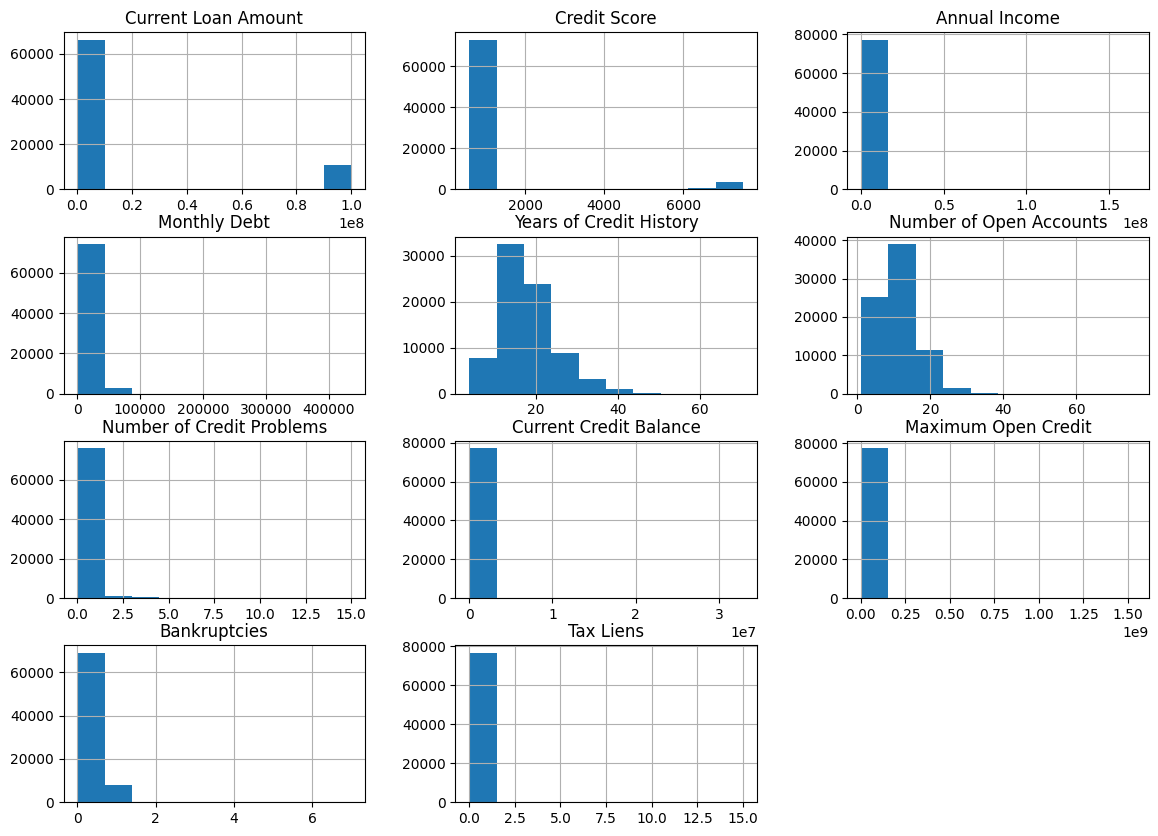

In [6]:
new_dataSet.hist(bins = 10 , figsize= (14,10))
plt.show()

remove duplicated values


In [7]:
print(new_dataSet.duplicated().sum())#print greater than 5000
new_dataSet.drop_duplicates(inplace=True)
print(new_dataSet.duplicated().sum())#هيطبع 0
new_dataSet.head()

9781
0


C:\Users\ehabe\AppData\Local\Temp\ipykernel_19476\2842531317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataSet.drop_duplicates(inplace=True)


,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


Extract unique values from specific Column

In [8]:
# Extract the unique values from a specific column
unique_values = new_dataSet['Years in current job'].unique()

# Display the unique values
for value in unique_values:
    print(value)

8 years
3 years
10+ years
< 1 year
2 years
4 years
1 year
6 years
5 years
7 years
9 years


<Axes: xlabel='Years in current job', ylabel='count'>

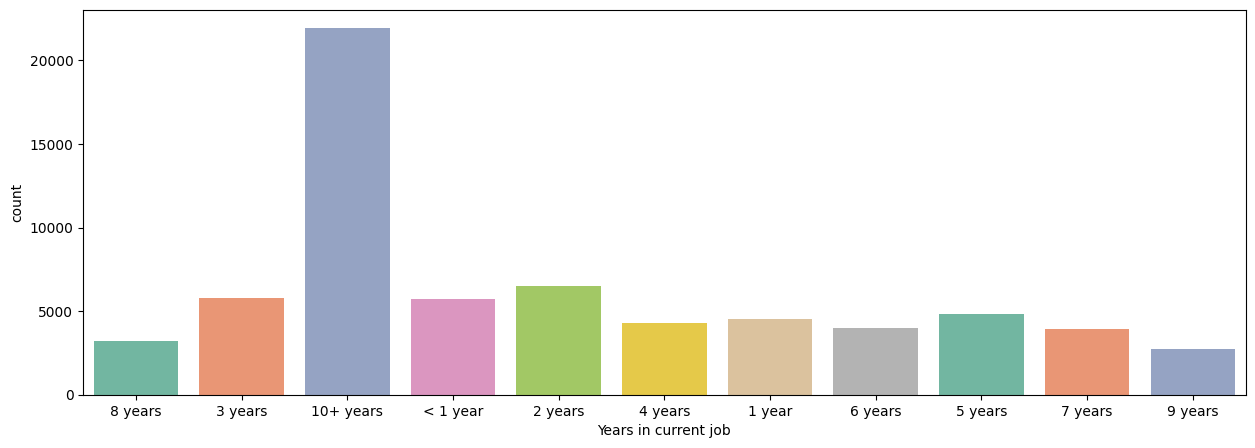

In [9]:
import seaborn as sns

plt.figure(figsize = (15,5))
sns.countplot(x= new_dataSet["Years in current job"], palette="Set2")

# making dectionary to encode year job unique values 

In [10]:
# making dectionary to encode year job unique values 
# to make it easier to the calculation that will be done further
yearJob_mapping = {
    "Years in current job": {
        "< 1 year": 0,
        "1 year": 1,
        "2 years": 2,
        "3 years": 3,
        "4 years": 4,
        "5 years": 5,
        "6 years": 6,
        "7 years": 7,
        "8 years": 8,
        "9 years": 9,
        "10+ years": 10
    }
}
new_dataSet=new_dataSet.replace(yearJob_mapping)
new_dataSet.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,Fully Paid,217646.0,Short Term,730.0,1184194.0,0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


show null Values

<Axes: >

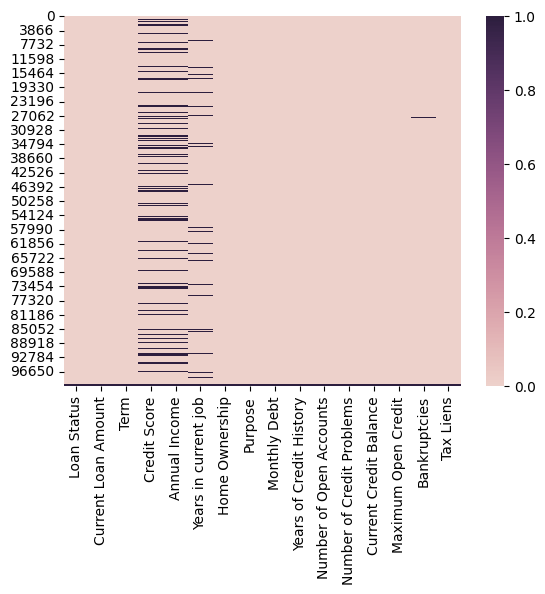

In [11]:
import seaborn as sns
sns.heatmap( datatset.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

After Remove Null Values

<Axes: >

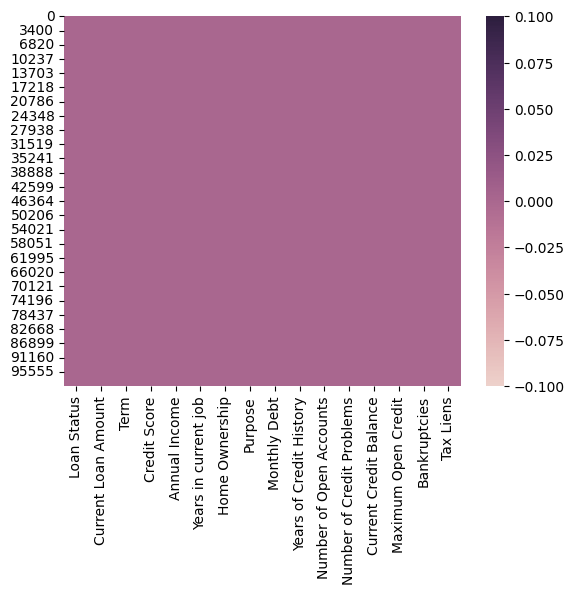

In [12]:
#cmap=sns.cubehelix_palette(as_cmap=True) sets the color map 
#In this case, the cubehelix_palette is used, which is a sequential color palette that provides a visually pleasing gradient of colors.
sns.heatmap( new_dataSet.isnull(),cmap=sns.cubehelix_palette(as_cmap=True))

to show 

#create chart visualization for the "Home Ownership"

In [13]:
#px.pie()-->دالة عشان ترسملي مخطط دائري
#color_discrete_sequence to determines the color sequence
import plotly.express as px
fig = px.pie(new_dataSet, names='Home Ownership', title='Home Ownership',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# DATA ENCODING


For loan status and Term we are going to use label encoding 

In [14]:
# Create an instance of LabelEncoder
lb = LabelEncoder()

# Perform label encoding on "Loan Status" column
new_dataSet['Loan Status'] = lb.fit_transform(new_dataSet['Loan Status'])

# Perform label encoding on "Term" column
new_dataSet['Term'] = lb.fit_transform(new_dataSet['Term'])


In [15]:
new_dataSet.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8,Home Mortgage,Home Improvements,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8,Own Home,Debt Consolidation,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3,Own Home,Debt Consolidation,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,0,206602.0,1,7290.0,896857.0,10,Home Mortgage,Debt Consolidation,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,0,Home Mortgage,Debt Consolidation,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0


In [16]:
#Splitting the features and result
X=new_dataSet.iloc[:, 1:]#all except first column
Y=new_dataSet.iloc[:, 0]#the first column only


display output in bar plot

<Axes: xlabel='Loan Status', ylabel='count'>

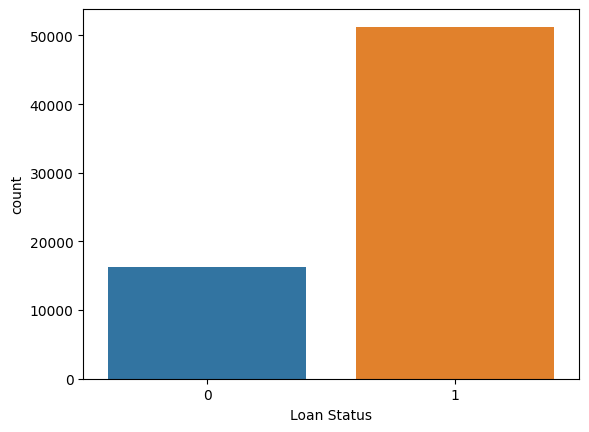

In [17]:
sns.countplot(x=new_dataSet["Loan Status"])
# "Approved=1" or "Rejected=0".

In [18]:
cols = ["Home Ownership","Purpose"]
for i in cols:
    en = LabelEncoder()
    new_dataSet[i] = en.fit_transform(new_dataSet[i])


In [19]:
new_dataSet.head(20)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8,1,5,5214.74,17.2,6.0,1.0,228190.0,416746.0,1.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8,2,3,29200.53,14.9,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3,2,3,8741.90,12.0,9.0,0.0,256329.0,386958.0,0.0,0.0
5,0,206602.0,1,7290.0,896857.0,10,1,3,16367.74,17.3,6.0,0.0,215308.0,272448.0,0.0,0.0
6,1,217646.0,1,730.0,1184194.0,0,1,3,10855.08,19.6,13.0,1.0,122170.0,272052.0,1.0,0.0
8,1,548746.0,1,678.0,2559110.0,2,3,3,18660.28,22.6,4.0,0.0,437171.0,555038.0,0.0,0.0
9,1,215952.0,1,739.0,1454735.0,0,3,3,39277.75,13.9,20.0,0.0,669560.0,1021460.0,0.0,0.0
10,1,99999999.0,1,728.0,714628.0,3,3,3,11851.06,16.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,1,99999999.0,1,740.0,776188.0,0,2,3,11578.22,8.5,6.0,0.0,134083.0,220220.0,0.0,0.0
13,1,99999999.0,1,743.0,1560907.0,4,3,3,17560.37,13.3,10.0,1.0,225549.0,496474.0,1.0,0.0


Normalization

In [20]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()#make all values between 0 and 1

# Apply normalization to the entire dataset
dataSet_scaled = scaler.fit_transform(new_dataSet)

In [21]:
pd.DataFrame(dataSet_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.004301,1.0,0.017906,0.006592,0.8,0.333333,0.333333,0.011965,0.202096,0.066667,0.066667,0.006940,0.000271,0.142857,0.0
1,1.0,1.000000,1.0,0.022527,0.013024,0.8,0.666667,0.200000,0.066998,0.167665,0.226667,0.066667,0.009063,0.000487,0.000000,0.0
2,1.0,0.003323,0.0,0.019639,0.004413,0.3,0.666667,0.200000,0.020057,0.124251,0.106667,0.000000,0.007796,0.000251,0.000000,0.0
3,0.0,0.001912,1.0,0.968231,0.004957,1.0,0.333333,0.200000,0.037554,0.203593,0.066667,0.000000,0.006549,0.000177,0.000000,0.0
4,1.0,0.002023,1.0,0.020939,0.006693,0.0,0.333333,0.200000,0.024906,0.238024,0.160000,0.066667,0.003716,0.000177,0.142857,0.0


removing outliers

In [22]:
import numpy as np
from scipy import stats

def remove_outliers(dataSet_scaled, threshold=3):
    z_scores = np.abs(stats.zscore(dataSet_scaled))
    filtered_data = dataSet_scaled[(z_scores < threshold)]
    return filtered_data

# Example usage
dataSet_scaled = np.array(dataSet_scaled)
filtered_data = remove_outliers(dataSet_scaled)
print("Original data:", dataSet_scaled)
print("Filtered data:", filtered_data)


Original data: [[1.00000000e+00 4.30056328e-03 1.00000000e+00 ... 2.70660352e-04
  1.42857143e-01 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 4.87154342e-04
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.32295250e-03 0.00000000e+00 ... 2.51314202e-04
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.30727718e-04
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 8.77275302e-04 1.00000000e+00 ... 3.49116562e-04
  1.42857143e-01 0.00000000e+00]
 [1.00000000e+00 5.14989427e-03 1.00000000e+00 ... 4.79467320e-04
  0.00000000e+00 0.00000000e+00]]
Filtered data: [1.00000000e+00 4.30056328e-03 1.00000000e+00 ... 4.79467320e-04
 0.00000000e+00 0.00000000e+00]


Sampling the data

In [23]:

from imblearn.combine import SMOTEENN
import pandas as pd

# Assuming you have your dataset loaded into a pandas DataFrame called "data"

# Separate features (X) and labels (y)
X = dataSet_scaled[:, 1:]  # Features, excluding the first column
y = dataSet_scaled[:, 0]  # Labels, first column only

# Create an instance of SMOTEENN
smote_enn = SMOTEENN()

# Apply combined sampling to the dataset
X_combined, y_combined = smote_enn.fit_resample(X, y)

# Print the class distribution before and after combined sampling
original_distribution = pd.Series(y).value_counts()
combined_distribution = pd.Series(y_combined).value_counts()

print("Original class distribution:")
print(original_distribution)

print("Class distribution after combined sampling:")
print(combined_distribution)

Original class distribution:
1.0    51276
0.0    16214
dtype: int64
Class distribution after combined sampling:
0.0    36047
1.0    26753
dtype: int64


feature extraction

In [24]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer()
# cv.fit(X)#convert each word into representaion like-->(eat)-->(1 0 0) and Learn vocab
# #joblib.dump(cv, 'CV.joblib')
# X=cv.transform(X).toarray()#convert representaion into vector
# print(X)
# cv.vocabulary_#positionبتظهرلي كل كلمة و جنبها   

split the dataset into training and testing

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=50)

To know the best K in KNN

In [26]:
# wcs=[]
# for i in range(1,70):
#     knn=KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train,y_train)
#     y_predict=knn.predict(X_test)
#     ac=accuracy_score(y_test,y_predict)
#     wcs.append(ac)
#     print("ACCURACY IN ",i,"is ",wcs,sep='---->')
    

Machine Learning Models

KNN

optimization using GridSearchCv

In [27]:
# Create and fit the KNN classifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1,3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier(n_neighbors=1)
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict the labels of the test set
#y_pred = knn.predict(X_test)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Evaluate the model with best hyperparameters on the test set
best_classifier = grid_search.best_estimator_
test_accuracy = best_classifier.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

# Evaluate the accuracy of the model
# cm=confusion_matrix(y_test,y_pred)
# accuracyKNN=accuracy_score(y_test,y_pred)
# print(cm)
# print("Train Accuracy ",knn.score(X_train, y_train))
# print("Test Accuracy ",accuracyKNN)

c:\Users\ehabe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\ehabe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:

Best Hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best Score:  0.9710987261146498


c:\Users\ehabe\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Test Accuracy:  0.9792993630573248


RandomForestClassifier and Give the best Test Accuracy

In [28]:
#the best Accuracy model 
from sklearn.ensemble import RandomForestClassifier
fr = RandomForestClassifier(max_depth=25, random_state=0)
fr.fit(X_train, y_train)
y_pred = fr.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
accuracyRF=accuracy_score(y_test,y_pred)
print(cm)
print(accuracyRF)
    

[[6810  452]
 [ 975 4323]]
0.8863853503184713


In [29]:
#save model
import joblib
joblib.dump(fr, 'random_forest_model.joblib')

['random_forest_model.joblib']

DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
accuracyDT=accuracy_score(y_test,y_pred)
print(cm)
print("Accuracy ",accuracyDT)

[[6383  879]
 [ 969 4329]]
Accuracy  0.8528662420382166


LogisticRegression

In [31]:
from sklearn.linear_model import LogisticRegression
LG=LogisticRegression()
LG.fit(X_train, y_train)


# Predict the target variable for the test data
Y_pred = LG.predict(X_test)

# Evaluate the model
accuracyLR = accuracy_score(y_test, Y_pred)
print("Train Accuracy ",LG.score(X_train,y_train))
print("Accuracy:", accuracyLR)



Train Accuracy  0.7823049363057325
Accuracy: 0.7828821656050955


c:\Users\ehabe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Support Vector Classifier

In [32]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
svm = SVC(max_iter=100,gamma='auto')
# Train the model on the training data
svm.fit(X_train, y_train)

# Predict the target variable for the test data
Y_pred = svm.predict(X_test)

# Evaluate the model
accuracySVC = accuracy_score(y_test, Y_pred)
print("Train Accuracy ",svm.score(X_train,y_train))
print("Accuracy:", accuracySVC)


c:\Users\ehabe\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



Train Accuracy  0.515983280254777
Accuracy: 0.5094745222929936


to show test accuracy for each model

In [33]:
Models = ['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest','SVM']
Test_Accuracy = [accuracyLR, test_accuracy, accuracyDT, test_accuracy,accuracySVC]
df_models = pd.DataFrame(data = [Test_Accuracy], index = ['Test Score'], columns = Models)
df_models

,Logistic Regression,K Nearest Neighbors,Decision Tree,Random Forest,SVM
Test Score,0.782882,0.979299,0.852866,0.979299,0.509475
